<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_okt_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok 3

<https://klajosw.blogspot.com/>


---

# [Modulok]


A `Python`ban, mint minden más modern nyelvben, szokás előre megírt, hasznos függvényeket és függvénycsomagokat használni. A Python szintaxisában az `import` parancs segítségével tudunk külső függvényeket, csomagokat vagy modulokat betölteni. 
Modulnak nevezünk egy `Python` nyelven írt file-t, ami `Python`-függvények, esetleg osztályok definícióit tartalmazza. Rendszerint ez egy `.py` kiterjeszésű file. Több ilyen definíciókat tartalmazó file-ok összességét hívjuk csomagnak. Nagy, sok függvénydefiníciót tartalmazó, csomagokat szokás alcsomagokra osztani. Ebben a notebookban a `numpy` a `matplotlib` és a `csv` csomagok néhány hasznos függvényével és adatstruktúrájával fogunk megismerkedni.  
Mielőtt ezeket használni tudnánk be kell őket tölteni. 
Lássunk erre egy példát!

In [0]:
import numpy

A fenti parancs betöltötte a `numpy` modult és ezzel a modulban definiált függvények és adatstruktúrák rendelkezésünkre állnak! A `numpy` csomag sok gyakran használt matematikai függvény implementációját is tartalmazza Határozzuk meg például, hogy mennyi $\sin(3)$ :

In [0]:
numpy.sin(3)

0.14112000805986721

Amint a fenti példa is illusztrálja egy betöltött modul függvényeit az alábbi szintaxis szerint kell használni
>```python
modul_neve.fuggveny_neve(...)
```

Egy modul nem csak függvényeket hanem előre definiált változókat is tartalmazhat. Például a `numpy` modul definiálja a matematikában és a fizikában is gyakran használt $e$ és $\pi$ számokat. Ezekre  - talán nem túl meglepő módon - így hivatkozunk:

In [0]:
numpy.e

2.718281828459045

In [0]:
numpy.pi

3.141592653589793

Nagy moduloknak sok almodulja is van. Az almodulokra az alábbi szintaxis alapján hivatkozunk:
>```python
modul_neve.almodul_neve.fuggveny_neve(...)
```

Például a `numpy` véletlenszámokat generáló függvényei a `random` almodul függvényeiként vannak definiálva. Az alábbi kódcella $0$ és $99$ között generál egy véletlen számot, ehhez a `numpy` modul  `random` almoduljának a `randint` fügvényét használja.

In [0]:
numpy.random.randint(100)

82

Előfordulhat, hogy egy modulból csak bizonyos függvényeket szeretnénk betölteni. Erre ad lehetőséget a 
>```python
from modul_neve import egyik_fuggveny_neve, masik_fuggveny_neve
```

konstrukció. Például ha a numpy csomagból csak a $\sin$ és $\cos$ függvényeket szeretnénk használni, akkor ezt az alábbi módon tehetjük meg:

In [0]:
from numpy import sin,cos

Ezután a modulnév használata nélkül rendelkezésünkre állnak a $\sin()$ és $\cos()$ függvények!

In [0]:
sin(23)**2+cos(23)**2

1.0

Egy modulból akár betölthetjük az összes függvényt és változót is:

In [0]:
from numpy import *

Ekkor már például hivatkozhatunk a $\pi$ értékét tároló `pi` változóra a `numpy` kiírása nélkül.

In [0]:
pi

3.141592653589793

A kurzus további részében - eltekintve néhány speciális esettől -  célszerű lesz minden notebookot néhány sokszor használt modul betöltésével kezdeni. Ezt a `jupyter` notebookokban az alábbi paranccsal ( cell magic-el ) tehetjük meg:

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


A fenti utasítás a következő importálásokat tartalmazza:

>```python
>import numpy
>import matplotlib
>from matplotlib import pylab, mlab, pyplot
>np = numpy
>plt = pyplot
>
>from IPython.display import display
>from IPython.core.pylabtools import figsize, getfigs
>
>from pylab import *
>from numpy import *
>```

Azaz a `numpy` numerikus csomagon túl többek közt betölti a `matplotlib` ábra készítő modult is. 

# Még egy adatstruktúra: `array`

A numpy csomag egy a listekhez hasonló adatstruktúrával gazdagítja a repertoárunkat. Ennek az új adatstruktúrának a neve: array. Tekintsük át az array-k viselkedésének  néhány alapvető tulajdonságát! (Részletesebb leírások [angol](https://scipy-lectures.github.io/intro/numpy/array_object.html) nyelven. )

A listek hez hasonlóan számok vagy más objektumok listáinak segítségével tudjuk őket definiálni:

In [0]:
vec=array([1,2,3])
vec

array([1, 2, 3])

In [0]:
matr=array([[1,1,3],[4,3,5],[6,2,3]])
matr

array([[1, 1, 3],
       [4, 3, 5],
       [6, 2, 3]])

In [0]:
b=array(['a','b','cd'])
b

array(['a', 'b', 'cd'], 
      dtype='<U2')

In [0]:
c=array([1,2,3,'sd',])
c

array(['1', '2', '3', 'sd'], 
      dtype='<U21')

In [0]:
d=array([[1,2],[1,3,4],23])
d

array([[1, 2], [1, 3, 4], 23], dtype=object)

Az utolsó pár példában a kiírásban megjelent `dtype=` azt jelzi, hogy az adott array-ben milyen jellegű dolgok vannak csoportosítva. Egy `array`-ban mindig a legáltalánosabb adattípus érvényesül. A `vec` és `matr` változókban skalárok vannak, a `b` és a `c` válltozóban karakterláncok. 
A `d` változóban pedig, mivel skalár (az utolsó szám) is van benne, meg listák is (az első két vektor), ezért általános "objektumok" halmazának csoportjaként jelenik meg.

## Egy pár hasznos array művelet:

Egy array alakjáról a `shape` attribútum segítségével érdeklődhetünk:

In [0]:
vec.shape

(3,)

In [0]:
matr.shape

(3, 3)

In [0]:
d.shape

(3,)

A `size` attribútum az elemek összes számáról ad tájékoztatást:

In [0]:
matr.size

9

Számosorok statisztikai vizsgálatában segít a `min` és a `max` (legkisebb és legnagyobb elem értéke), illetve a `mean` (átlag) és az `std` (szórás) függvények

In [0]:
vec.min()

1

In [0]:
vec.max()

3

In [0]:
vec.mean()

2.0

In [0]:
vec.std()

0.81649658092772603

Ha az array alakja nem egydimenziós, mint például a `matr` változó esetében, akkor a fenti függvényeket soronként vagy oszloponként is hattathatjuk a változóra:

In [0]:
matr.mean(axis=0) #oszlop szerinti átlag

array([ 3.66666667,  2.        ,  3.66666667])

In [0]:
matr.mean(axis=1) #sor szerint

array([ 1.66666667,  4.        ,  3.66666667])

A `matr` mátrix transzponáltját a `T` attribútum segítségével kapjuk.

In [0]:
matr.T

array([[1, 4, 6],
       [1, 3, 2],
       [3, 5, 3]])

Egy array-ban jelenlévő elemek szorzata és összege a `sum`, illetve a `prod` segítségével kapható:

In [0]:
vec.sum() # A vec változó összes elemének az összege

6

In [0]:
matr.prod() # A matr változó összes elemének szorzata

6480

Azonban vigyázni kell, mert nem minden arrayfüggvény alkalmazható minden array-re! Ha karaktereket tartalmazó mátrix produktumára vagyunk kíváncsiak akkor hibát fogunk kapni!

In [0]:
matrS=array([['a','b'],['c','d']])

In [0]:
matrS.prod()

TypeError: cannot perform reduce with flexible type

Néhány függvény segíti, hogy valamilyen előre megadott struktúrával rendelkező array-ek generáljunk. Lássunk erre néhány példát!
A `linspace()` függvény egy megadott kezdő- és végérték között megadott számú egyenletesen mintavételezett számot ad:

In [0]:
linspace(0,pi,10) #10 szám 0 és pi között.. 

array([ 0.        ,  0.34906585,  0.6981317 ,  1.04719755,  1.3962634 ,
        1.74532925,  2.0943951 ,  2.44346095,  2.7925268 ,  3.14159265])

A `rand()` függvény és a hozzá hasonló `randn()`, illetve `randint()` véletlen számokat tartalmazó array-ket adnak.

In [0]:
rand() #0 és 1 között egy véletlen szám

0.1262308349286887

In [0]:
randn(3) #3 darab véletlen Normális elpszlású szám 

array([ 0.41822238, -0.74672338, -0.76571842])

In [0]:
randint(0,9,(2,3)) # egy 2x3 as véletlen mátrix amely 0 és 9 közötti egész számokat tartalmaz

array([[5, 1, 0],
       [7, 3, 1]])

Fontos megjegyezni, hogy bizonyos alapműveletek (összeadás, kivonás, szorzás és osztás) és alapvető matematikai függvények (például a sin, cos és exp függvények) array típusú változókra elemenként hatnak!

In [0]:
v1=array([1,2,3])
v2=array([2,3,3])
v1*v2

array([2, 6, 9])

In [0]:
sin(v1)

array([ 0.84147098,  0.90929743,  0.14112001])

Bool típusú változók array-énak összege elemenkénti `or`,  szorzata elemenkénti `and` műveletnek felel meg:

In [0]:
b1=array([True,False,True,False])
b2=array([False,False,True,True])

In [0]:
b1+b2 

array([ True, False,  True,  True], dtype=bool)

In [0]:
b1*b2

array([False, False,  True, False], dtype=bool)

## Array típusú változók indexelései

Az array típusú változók legfontosabb tulajdonsága, hogy a list-eknél jóval gazdagabb indexelési módszerekkel rendelkeznek. Nézzünk ezekre néhány példát! Előszöris definiáljunk néhány változót:

In [0]:
proba1=linspace(0,10,10) #1-től 10-ig 10 db egyenletes szám
proba2=rand(10) #10 véleteln szám
proba3=randint(0,10,(5,5)) #5x5 ös véletlen mátrix

A list-eknél megszokott szeletelések itt is működnek:

In [0]:
proba1[0:3]

array([ 0.        ,  1.11111111,  2.22222222])

In [0]:
proba1[-4:-1]

array([ 6.66666667,  7.77777778,  8.88888889])

A list-ekkel ellentétben itt egy tetszőleges indexlistát is megadhatunk indexelésként:

In [0]:
proba1[[3,5,2]]

array([ 3.33333333,  5.55555556,  2.22222222])

Egy másik hasznos dolog, hogy egy array-ből Bool típusú array segítségével valamilyen kritériumokat teljesítő elemeket választhatunk ki:

In [0]:
proba1>5 # Ez a kifejezés egy bool típusú array-t ad vissza

array([False, False, False, False, False,  True,  True,  True,  True,  True], dtype=bool)

Ha a fenti Bool típusú array-t mint indexet használjuk a proba1 hasában, akkor egy olyan array-t kapunk, amely a `proba1`-nek csak azon elemeit tartalmazza, ahol a Bool érték `True` volt, azaz az utolsó 5 elemet!

In [0]:
proba1[proba1>5]

array([  5.55555556,   6.66666667,   7.77777778,   8.88888889,  10.        ])

Adatbázisok elemzésénél egy igen hasznos művelet valamilyen tulajdonság szerint válogatni az adatbázisban. Ezen feladatok  sokszor megfogalmazhatóak úgy, mint egy array elemeinek egy másik array elemei szerinti szelektálása! Vizsgáljuk meg például a `proba1` azon elemeit amelyeknek megfelelő elemek a `proba2`-ben 0.25-nél nagyobbak:

In [0]:
proba1[proba2>0.25]

array([ 0.        ,  1.11111111,  2.22222222,  4.44444444,  5.55555556,
        6.66666667,  7.77777778,  8.88888889])

Végül áljon itt egy pár grafikus példa magasabb dimmenziójú array változók indexeléseire:
<table style="width:100%;border: 0px solid #ffffff">
<tr style="border: 0px solid #ffffff">
<td style="border: 0px solid #ffffff">
<img src="https://scipy-lectures.github.io/_images/numpy_indexing.png" width=400> 
</td>
<td style="border: 0px solid #ffffff">
<img src="http://scipy-lectures.github.io/_images/numpy_fancy_indexing.png" width=400>
</td>
</tr>
</table>

# Ábrákról dióhéjban

Igen sokszor egy program futása végén a kiszámolt eredményeket ábrákban foglaljuk össze. A `Python` nyelvben sok modul van, ami ábra készítésére alkalmas, ezek közül talán a legelterjedtebb a `matplotlib`. Az alábbiakban néhány egyszerűbb ábrakészítési feladatot tekintünk át. 
A `plot()` függvény, amit a későbbiekben is igen gyakran fogunk használni, a legalapvetőbb ábrakészítő függvény.
Ezt a függvény a `matplotlib` modul `pyplot` almoduljában található. Tehát ha a `matplotlib` modult betöltöttük akkor az alábbi módon használható:

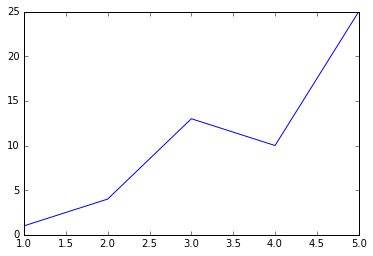

In [0]:
x=[1,2,3,4,5]
y=[1,4,13,10,25]
matplotlib.pyplot.plot(x,y)

A fenti parancs tehát az `y` tömböt ábrázolja az `x` függvényében. 

Mivel a notebook elején lefuttatuk a  `%pylab inline` parancsot, ami többek között a `matplotlib.pyplot` modulból is betöltötte az összes függvényt, ezért elegendő a `plot()` függvényt magában hívni!

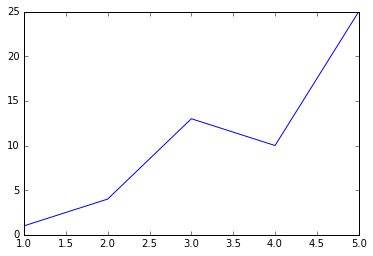

In [0]:
plot(x,y)

A `Python`-ban konkrét matematikai függvények ábrázolásának az a legegyszerűbb módja, ha két tömböt generálunk, egyet, amely azokat a pontokat tartalmazza, ahol a függvényt ki szeretnénk értékelni, illetve egyet, amely a függvény értékét tartalmazza a kiértékelendő pontokban. Ezeket a `plot()` függvény segítségével ábrázoljuk.
Az alábbi példán a $\sin(t)$ függvényt ábrázoljuk a $[0,2\pi]$ intervallumon tíz darab mintavételezési pontot használva.

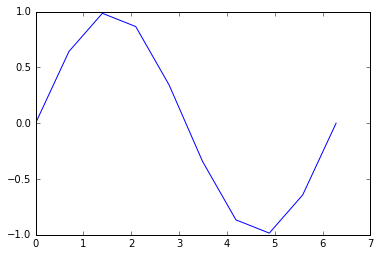

In [0]:
t=linspace(0,2*pi,10)
plot(t,sin(t))

Ha több mintavételezési pontot használunk akkor simább függvényt kapunk. Ezt úgy érhetjük el, ha a `linspace()` függvény harmadik változójának segítségével megnöveljük a legenerált értékek számát. 

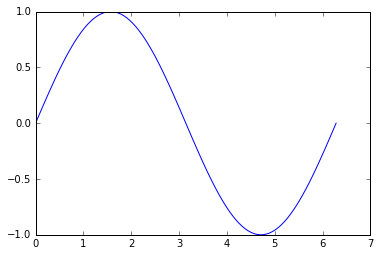

In [0]:
t=linspace(0,2*pi,100) 
plot(t,sin(t))

Ha egyszerre több függvényt szeretnénk ábrázolni, akkor egy kódcellán belül több `plot()` parancsot is kiadhatunk:

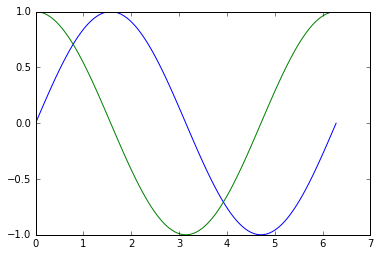

In [0]:
plot(t,sin(t))
plot(t,cos(t))

Ha kétváltozós függvényt szeretnénk ábrázolni, akkor ahhoz a mintavételezést a `numpy` csomag `meshgrid()` függvényével tehetjük meg az alábbi szintaxis szerint:

In [0]:
xrange=linspace(-3,3,100) # határok és pontok száma az x irányba
yrange=linspace(-3,3,100) # határok és pontok száma az y irányba
x,y=meshgrid(xrange,yrange) # mintavételezés az x és y síkban

Két változós függvényt a `pcolor()` `matplotlib` függvény segítségével tudunk ábrázolni. A fent definiált `x` és `y` tömbök segítségével például az $$f(x,y)=\mathrm{e}^{-(x^2+y^2)}$$ kétdimenziós Gauss-görbét az alábbi módon ábrázolhatjuk:

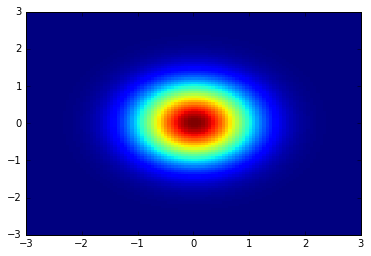

In [0]:
pcolor(x,y,exp(-(x**2+y**2)))

Végül a statisztikus problémák vizsgálatakor számtalanszor használt hisztogramkészítéssel ismerkedjünk. Erre a `matplotlib` modul a `hist()` függvényét fogjuk használni. Előszöris gyártsunk a `numpy` modul `random` almoduljának `randn()` függvényével ezer darab véletlen számot. A  `randn()` függvény Gauss-eloszlás szerint generál véletlen számokat. A `numpy` `random` modulja sok egyéb más eloszlás szerint is tud véletlenszámokat generálni, a rendelkezésre álló generátorokról [itt](http://docs.scipy.org/doc/numpy/reference/routines.random.html) található információ.

In [0]:
gauss_eloszlas=random.randn(1000)

Egy adatsor hisztogramját egyszerűen a `hist()` függvénnyel lehet legyártani:

(array([   1.,    6.,   14.,   79.,  197.,  271.,  273.,  117.,   34.,    8.]),
 array([-4.29185613, -3.54341105, -2.79496596, -2.04652088, -1.29807579,
        -0.54963071,  0.19881438,  0.94725946,  1.69570454,  2.44414963,
         3.19259471]),
 <a list of 10 Patch objects>)

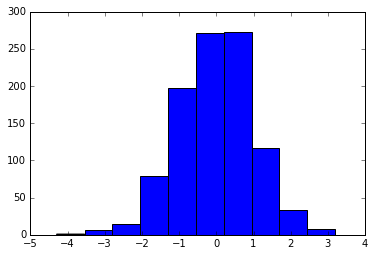

In [0]:
hist(gauss_eloszlas)

A fenti ábrán az ábrázolt intervallumot a hist parancs, az alapértelmezésnek megfelelően 10 alintervallumra osztja, és azt jeleníti meg, hogy az adott alintervallumban hány érték található a bemeneti `gauss_eloszlas` tömbben. 

Fontos megjegyezni hogy a `plot()`, `pcolor()` és`hist()` parancsoknak a fent tárgyalt legegyszerűbb használatán túl számos alapértelmezett értékekkel ellátott kulcsszavas argumentuma van, melyekről egy rövid leírás a megfelelő függvény dokumentációjában ( a docstringjében ) található.